<h1>SOLVING AND CODING

Q3) Write a PyTorch or NumPy function: <br>
Attention(Q,K,V) = softmax(QK^T/sqrt(dk))V <br> <br>
Inputs: <br>
● Q, K, V (matrices) <br><br>
Outputs: <br>
● Attention output<br>
● Attention weights matrix

In [4]:
import numpy as np

def attention(Q, K, V):
    dk = Q.shape[-1]
    scores = Q @ K.T / np.sqrt(dk)
    weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
    output = weights @ V
    return output, weights # required outputs

Q4) Modify Q3 so positions cannot attend to future tokens:<br>
● Set those entries to -inf <br>
● Apply softmax afterward <br>
Demonstrate that masking prevents access to future words.

In [5]:
def masked_attention(Q, K, V):
    dk = Q.shape[-1]
    scores = Q @ K.T / np.sqrt(dk)

    mask = np.triu(np.ones(scores.shape), k=1)
    scores[mask == 1] = -np.inf # setting to -inf

    # applying softmax
    weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
    output = weights @ V
    return output, weights

Q5) Visualize Attention Heads. <br>
Feed a sentence into a pre trained transformer
(e.g., BERT from HuggingFace), plot attention maps.

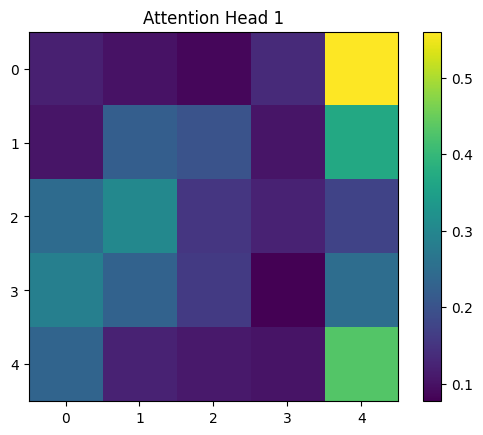

In [6]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

inputs = tokenizer("Transformers learn attention", return_tensors="pt")
outputs = model(**inputs)

attentions = outputs.attentions[0][0]  # layer 1, batch 1

plt.imshow(attentions[0].detach())
plt.colorbar()
plt.title("Attention Head 1")
plt.show()